In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 코드 5-4 훈련, 검증, 테스트 폴더로 이미지 복사하기
import os, shutil

# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = 'C:/Users/82106/Desktop/학교 수업/4학년 1학기/통계학특강/5장/dogs-vs-cats/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = 'C:/Users/82106/Desktop/학교 수업/4학년 1학기/통계학특강/5장/dogs-vs-cats/small_new_datasets'
os.mkdir(base_dir) # 폴더 생성 함수

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train') # 새 경로를 만들어내는 함수
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst) # shutil.copyfile(원본 파일 경로, 대상 파일 경로), 원본경로의 파일을 대상 파일 경로에 복사

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
print('훈련용 고양이 이미지 전체 개수 :',len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수 :',len(os.listdir(train_dogs_dir)))
print('훈련용 고양이 이미지 전체 개수 :',len(os.listdir(validation_cats_dir)))
print('훈련용 강아지 이미지 전체 개수 :',len(os.listdir(validation_dogs_dir)))
print('훈련용 고양이 이미지 전체 개수 :',len(os.listdir(test_cats_dir)))
print('훈련용 강아지 이미지 전체 개수 :',len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수 : 1000
훈련용 강아지 이미지 전체 개수 : 1000
훈련용 고양이 이미지 전체 개수 : 500
훈련용 강아지 이미지 전체 개수 : 500
훈련용 고양이 이미지 전체 개수 : 500
훈련용 강아지 이미지 전체 개수 : 500


In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [9]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255) # 이미지 파일을 전처리된 배치 텐서로 전환하는 함수
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100, # 하나의 에폭 당 몇개의 배치를 생성하는지, 지정 숫자만큼 경사하강법으로 모수 최신화 후 다음 에폭으로 넘어감 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50  # 검증,초모수 조절을 위해 얼마나 많은 배치를 추출할지 결정 
      )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 70s 701ms/step - loss: 0.6908 - acc: 0.5055 - val_loss: 0.6879 - val_acc: 0.5250
Epoch 2/30
100/100 [==============================] - 77s 774ms/step - loss: 0.6660 - acc: 0.5995 - val_loss: 0.6445 - val_acc: 0.6330
Epoch 3/30
100/100 [==============================] - 83s 831ms/step - loss: 0.6366 - acc: 0.6440 - val_loss: 0.6408 - val_acc: 0.6230
Epoch 4/30
100/100 [==============================] - 90s 897ms/step - loss: 0.5919 - acc: 0.6865 - val_loss: 0.5948 - val_acc: 0.6720
Epoch 5/30
100/100 [==============================] - 76s 765ms/step - loss: 0.5557 - acc: 0.7140 - val_loss: 0.6414 - val_acc: 0.6420
Epoch 6/30
100/100 [==============================] - 73s 735ms/step - loss: 0.5215 - acc: 0.7495 - val_loss: 0.5917 - val_acc: 0.6880
Epoch 7/30
100/100 [==============================] - 80s 798ms/step - loss: 0.5116 - acc: 0.7485 - val_loss: 0.57

In [12]:
# 모델 저장하기 
model.save('cats_and_dogs_small_1.h5')

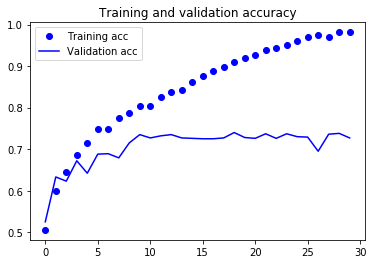

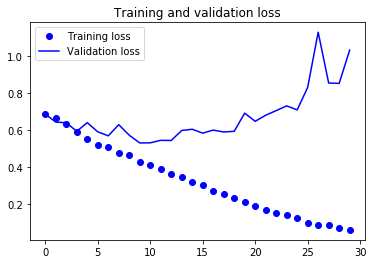

In [13]:
# 그래프를 통한 acc,loss 변화 그래프 확인 
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
# 코드 5-11 ImageDataGenerator를 사용하여 데이터 증식 설정하기
# 전단 변환 설명 : https://ko.wikipedia.org/wiki/%EC%A0%84%EB%8B%A8%EB%B3%80%ED%99%98%ED%96%89%EB%A0%AC
datagen = ImageDataGenerator(
      rotation_range=40,        # 회전범위
      width_shift_range=0.2,    # 좌우 이동 비율 범위 , 1보다 큰 값은 비율이 아닌 픽셀 값으로 간주 
      height_shift_range=0.2,   # 위아래 이동 비율 범위 
      shear_range=0.2,          # 전단 변환? 각도 범위
      zoom_range=0.2,           # 확대 범위
      horizontal_flip=True,    # 랜덤하게 수평으로 뒤집기
      fill_mode='nearest'       # 비어 있는 곳 픽셀 채우는 방법 
      )

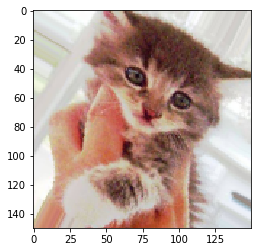

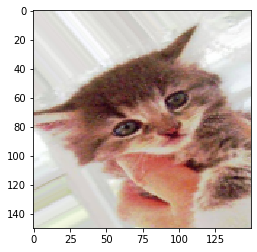

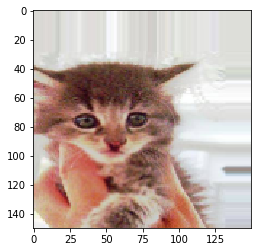

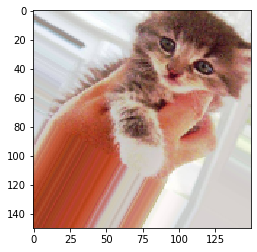

In [15]:
# 랜덤 증식 이미지 그리기

from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택
image_path=fnames[3] 

img = image.load_img(image_path,target_size=(150,150))

# 선택한 이미지 텐서화, (1,150,150,3) 형태로 만들기 
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)

# 위에서 설정한 datagenerator로 4개의 이미지 랜덤 생성 
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4==0:
        break

plt.show()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
 63/100 [=================>............] - 80s 1s/step - loss: 0.6933 - acc: 0.5115 - val_loss: 0.6834 - val_acc: 0.5270


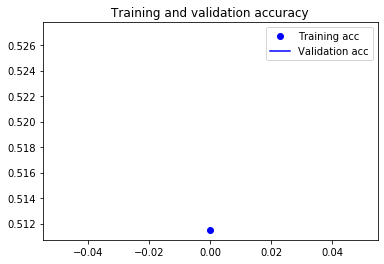

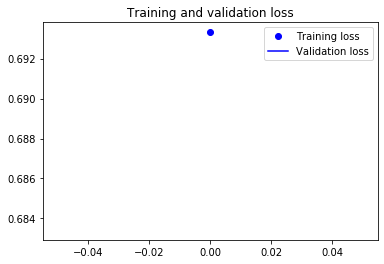

In [16]:
# 최종적으로 droptout과 이미지 증식까지 활용한 최종 코드
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

model.save('cats_and_dogs_small_2.h5')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 사전 훈련된 모델 사용하기 

In [17]:
# 코드 5-16 VGG16 합성곱 기반 층 만들기
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',         # 모델초기화 시 가중치 체크 포인트
                  include_top=False,         # 완전 연결 분류기(dense)를 연결할 지 포함 
                  input_shape=(150, 150, 3))  # 입력 데이터 텐서 형태 및 크기 

In [18]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [19]:
# 합성곱 층과 분류기 층을 따로따로 운영하는 방법 
#코드 5-17 사전 훈련된 합성곱 기반 층을 사용한 특성 추출하기 + 특성맵 펼치기
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'C:/Users/82106/Desktop/학교 수업/4학년 1학기/통계학특강/5장/dogs-vs-cats/small_new_datasets'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512)) # VGG 모델의 최종 출력 형태에 맞추기 
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(             # 이미지 데이터 생성
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:                           # 생성된 텐서의 특성과 라벨
        features_batch = conv_base.predict(inputs_batch)                   # VGG 모델에 특성을 넣고 값 생성 
        features[i * batch_size : (i + 1) * batch_size] = features_batch   # 한번에 batch_size만큼 예측값 생성, 만들어낸 값 대입
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

# 생성된 것들을 전체 분류기에 넣기 위해 reshape, flatten의 역할과 같음 
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
# 코드 5-18 완전 연결 분류기를 정의하고 훈련하기
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 3s 32ms/step - loss: 0.5929 - acc: 0.6875 - val_loss: 0.4431 - val_acc: 0.8280
Epoch 2/30
100/100 [==============================] - 3s 32ms/step - loss: 0.4232 - acc: 0.8125 - val_loss: 0.3609 - val_acc: 0.8650oss: 0.451
Epoch 3/30
100/100 [==============================] - 3s 32ms/step - loss: 0.3483 - acc: 0.8485 - val_loss: 0.3248 - val_acc: 0.8670
Epoch 4/30
100/100 [==============================] - 3s 32ms/step - loss: 0.3167 - acc: 0.8745 - val_loss: 0.2967 - val_acc: 0.8820
Epoch 5/30
100/100 [==============================] - 3s 32ms/step - loss: 0.2884 - acc: 0.8835 - val_loss: 0.2944 - val_acc: 0.8710
Epoch 6/30
100/100 [==============================] - 3s 32ms/step - loss: 0.2617 - acc: 0.8940 - val_loss: 0.2960 - val_acc: 0.8690
Epoch 7/30
100/100 [==============================] - 3s 33ms/step - loss: 0.2437 - acc: 0.9045 - val_loss: 0.2624 - val_acc: 0.8970
Epoch 8/30
100/100 [==============================] - 3s 32

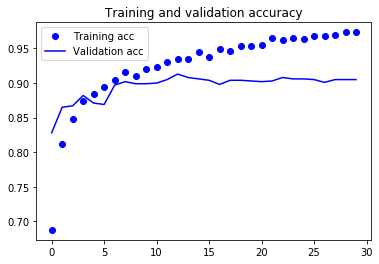

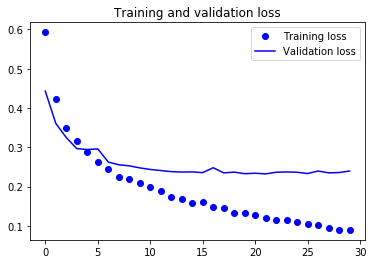

In [21]:
# 코드 5-19 결과 그래프 그리기
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
# 데이터 증식을 사용, 엔드 투 엔드 모델 사용 
# 기존 VGG 모델에 분류기 모델을 확장하여 사용 
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 미리 학습된 VGG 합성곱 층의 모수는 그대로 사용해야 하므로 이 가중치는 동결해야함
# 분류기만 새로 학습하게 됨 
conv_base.trainable = False

In [25]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 - 376s - loss: 0.5345 - acc: 0.7440 - val_loss: 0.4066 - val_acc: 0.8480
Epoch 2/30
100/100 - 363s - loss: 0.4026 - acc: 0.8350 - val_loss: 0.3353 - val_acc: 0.8730
Epoch 3/30
100/100 - 373s - loss: 0.3611 - acc: 0.8400 - val_loss: 0.3128 - val_acc: 0.8790
Epoch 4/30
100/100 - 379s - loss: 0.3182 - acc: 0.8700 - val_loss: 0.2864 - val_acc: 0.8880
Epoch 5/30
100/100 - 367s - loss: 0.2995 - acc: 0.8740 - val_loss: 0.2772 - val_acc: 0.8970
Epoch 6/30
100/100 - 374s - loss: 0.2829 - acc: 0.8875 - val_loss: 0.2671 - val_acc: 0.8990
Epoch 7/30
100/100 - 349s - loss: 0.2714 - acc: 0.8890 - val_loss: 0.2612 - val_acc: 0.9000
Epoch 8/30
100/100 - 330s - loss: 0.2611 - acc: 0.8955 - val_loss: 0.2585 - val_acc: 0.8970
Epoch 9/30
100/100 - 356s - loss: 0.2528 - acc: 0.8990 - val_loss: 0.2541 - val_acc: 0.8990
Epoch 10/30
100/100 - 352s - loss: 0.2630 - acc: 0.8960 - val_loss: 0.2747 - val_acc: 0.

KeyboardInterrupt: 

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 미세 조정 
# 특성추출을 보완하기 위해 미세 조정을 사용
# 동결 모델의 상위 몇개층(후반부)을 동결을 풀어 입력데이터에 맞게 조절하는 방법 
# 상위층은 구체적인 특성을 파악하므로 주어진 샘플만이 가지는 특성에 적용하기 위해 상위층의 동결을 해제 
# 또한 일부 층만 동결을 풀어야 학습되는 가중치의 수가 줄어 과대 적합을 막는다. 최상위 2~3개 추천 
# 동결을 풀기 전 분류기는 미리 학습되어야 함

# 코드 5-22 특정 층까지 모든 층 동결하기
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:      # layer는 하위에서 상위로 이름 순서
    if layer.name == 'block5_conv1':# block5_conv1 이후부터는 두 번째 조건문으로 인해 밑의 층들은 학습 동결을 해제 
        set_trainable = True        # 각 층별 동결 여부를 개별적으로 설정 가능 
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
# 코드 5-23 모델 미세 조정하기

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 코드 5-24 부드러운 그래프 그리기 , 지수이동평균 활용 
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:                    # 빈 리스트면 False 아니면 True => 첫 point만 그대로 투입 나머진 이동평균 적용 
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 테스트로 모델 평가하기
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

In [ ]:
# 중간층 활성화 시각화 하기 

# 모델 로드 
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

In [ ]:
# 코드 5-25 개별 이미지 전처리하기
img_path = 'C:/Users/82106/Desktop/학교 수업/4학년 1학기/통계학특강/5장/dogs-vs-cats/small_new_datasets/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)

# 이미지를 4D 텐서로 변경합니다
img_tensor = np.expand_dims(img_tensor, axis=0)
# 모델이 훈련될 때 입력에 적용한 전처리 방식을 동일하게 사용합니다
img_tensor /= 255.

# 이미지 텐서의 크기는 (1, 150, 150, 3)입니다
print(img_tensor.shape)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
# 코드 5-27 입력 텐서와 출력 텐서의 리스트로 모델 인스턴스 만들기
from keras import models

# 상위 8개 층의 출력을 추출합니다:
layer_outputs = [layer.output for layer in model.layers[:8]]
# 입력에 대해 8개 층의 출력을 반환하는 모델을 만듭니다, 하나의 입력과 여러개의 출력 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
# 코드 5-28 예측 모드로 모델 실행하기
# 층의 활성화마다 하나씩 8개의 넘파이 배열로 이루어진 리스트를 반환합니다:
activations = activation_model.predict(img_tensor)

In [ ]:
# 코드 5-29 20번째 채널 시각화하기
# 첫 번째 층의 여러가지 채널을 확인 
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')
plt.show()

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')
plt.show()

In [ ]:
# 코드 5-31 중간층의 모든 활성화에 있는 채널 시각화하기

# 층의 이름을 그래프 제목으로 사용합니다
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# 특성 맵을 그립니다
for layer_name, layer_activation in zip(layer_names, activations):
    # 특성 맵에 있는 특성의 수
    n_features = layer_activation.shape[-1]

    # 특성 맵의 크기는 (1, size, size, n_features)입니다
    size = layer_activation.shape[1]

    # 활성화 채널을 위한 그리드 크기를 구합니다
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # 각 활성화를 하나의 큰 그리드에 채웁니다
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            # 그래프로 나타내기 좋게 특성을 처리합니다. 표준화한 뒤 표준점수 2.0 이내의 값들이 0~255사이로 가도록 처리
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # 그리드를 출력합니다
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

In [ ]:
# 필터 시각화

# 코드 5-32 필터 시각화를 위한 손실 텐서 정의하기
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [ ]:
# 코드 5-33 입력에 대한 소실의 그래디언트 구하기

# gradients 함수가 반환하는 텐서 리스트(여기에서는 크기가 1인 리스트)에서 첫 번째 텐서를 추출합니다
grads = K.gradients(loss, model.input)[0]

In [ ]:
# 코드 5-34 그래디언트 정규화하기

# 0 나눗셈을 방지하기 위해 1e–5을 더합니다
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [ ]:
# 코드 5-35 입력 값에 대한 넘파이 출력 값 추출하기

iterate = K.function([model.input], [loss, grads])

# 테스트:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [ ]:
# 코드 5-36 확률적 경사 상승법을 사용한 손실 최대화하기

# 잡음이 섞인 회색 이미지로 시작합니다
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# 업데이트할 그래디언트의 크기
step = 1.
for i in range(40):   # 경사 상승법을 40회 실행합니다
    # 손실과 그래디언트를 계산합니다
    loss_value, grads_value = iterate([input_img_data])
    # 손실을 최대화하는 방향으로 입력 이미지를 수정합니다
    input_img_data += grads_value * step

In [ ]:
# 코드 5-37 텐서를 이미지 형태로 변환하기 위한 유틸리티 함수

def deprocess_image(x):
    # 텐서의 평균이 0, 표준 편차가 0.1이 되도록 정규화합니다
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # [0, 1]로 클리핑합니다
    x += 0.5
    x = np.clip(x, 0, 1)

    # RGB 배열로 변환합니다
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [ ]:
# 코드 5-37 필터 시각화 이미지를 만드는 함수

def generate_pattern(layer_name, filter_index, size=150):
    # 주어진 층과 필터의 활성화를 최대화하기 위한 손실 함수를 정의합니다
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # 손실에 대한 입력 이미지의 그래디언트를 계산합니다
    grads = K.gradients(loss, model.input)[0]

    # 그래디언트 정규화
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # 입력 이미지에 대한 손실과 그래디언트를 반환합니다
    iterate = K.function([model.input], [loss, grads])

    # 잡음이 섞인 회색 이미지로 시작합니다
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # 경사 상승법을 40 단계 실행합니다
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

    img = input_img_data[0]
    return deprocess_image(img)

In [ ]:
plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

In [ ]:
# 코드 5-39 층에 있는 각 필터에 반응하는 패턴 생성하기

for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5

    # 결과를 담을 빈 (검은) 이미지
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3), dtype='uint8')

    for i in range(8):  # results 그리드의 행을 반복합니다
        for j in range(8):  # results 그리드의 열을 반복합니다
            # layer_name에 있는 i + (j * 8)번째 필터에 대한 패턴 생성합니다
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            # results 그리드의 (i, j) 번째 위치에 저장합니다
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # results 그리드를 그립니다
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.show()

In [ ]:
# 코드 5-40 사전 훈련된 가중치로 VGG16 네트워크 로드하기

from keras.applications.vgg16 import VGG16

K.clear_session()

# 이전 모든 예제에서는 최상단의 완전 연결 분류기를 제외했지만 여기서는 포함합니다
model = VGG16(weights='imagenet')

In [ ]:
# 코드 5-41 VGG16을 위해 입력 이미지 전처리하기

from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# 이미지 경로
img_path = 'C:/Users/82106/Desktop/쿠빅/딥러닝 세션/elephant.jpg'

# 224 × 224 크기의 파이썬 이미징 라이브러리(PIL) 객체로 반환됩니다
img = image.load_img(img_path, target_size=(224, 224))

# (224, 224, 3) 크기의 넘파이 float32 배열
x = image.img_to_array(img)

# 차원을 추가하여 (1, 224, 224, 3) 크기의 배치로 배열을 변환합니다
x = np.expand_dims(x, axis=0)

# 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
x = preprocess_input(x)

In [ ]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

In [ ]:
# 최대 활성화 항목, 아프리카 코끼리에 대한 클래스 
np.argmax(preds[0])

In [ ]:
# 코드 5-42 Grad-CAM 알고리즘 설명하기

idx_ele = np.argmax(preds[0])

# 예측 벡터의 '아프리카 코끼리' 항목
african_elephant_output = model.output[:, idx_ele]

# VGG16의 마지막 합성곱 층인 block5_conv3 층의 특성 맵
last_conv_layer = model.get_layer('block5_conv3')

# block5_conv3의 특성 맵 출력에 대한 '아프리카 코끼리' 클래스의 그래디언트
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# 특성 맵 채널별 그래디언트 평균 값이 담긴 (512,) 크기의 벡터
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# 샘플 이미지가 주어졌을 때 방금 전 정의한 pooled_grads와 block5_conv3의 특성 맵 출력을 구합니다
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# 두 마리 코끼리가 있는 샘플 이미지를 주입하고 두 개의 넘파이 배열을 얻습니다
pooled_grads_value, conv_layer_output_value = iterate([x])

# "아프리카 코끼리" 클래스에 대한 "채널의 중요도"를 특성 맵 배열의 채널에 곱합니다
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# 만들어진 특성 맵에서 채널 축을 따라 평균한 값이 클래스 활성화의 히트맵입니다
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [ ]:
# 코드 5-43 히트맵 후처리하기
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [ ]:
# 코드 5-44 원본 이미지에 히트맵 덧붙이기

import cv2

# cv2 모듈을 사용해 원본 이미지를 로드합니다
img = cv2.imread(img_path)

# heatmap을 원본 이미지 크기에 맞게 변경합니다
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# heatmap을 RGB 포맷으로 변환합니다
heatmap = np.uint8(255 * heatmap)

# 히트맵으로 변환합니다
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 0.4는 히트맵의 강도입니다
superimposed_img = heatmap * 0.4 + img

# 디스크에 이미지를 저장합니다
cv2.imwrite('C:/Users/82106/Desktop/쿠빅/딥러닝 세션/elephant_cam.jpg', superimposed_img)